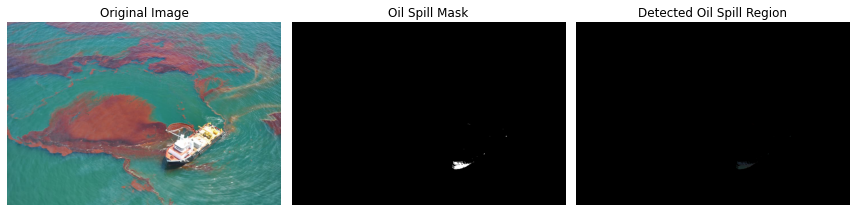

True

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\Bindushree\Desktop\os-03-skimming-oil.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to HSV (Hue, Saturation, Value) color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the HSV range for detecting oil spill (tune this based on your image)
# Example: Dark patches with oily appearance
lower_bound = np.array([0, 0, 0])     # Lower bound of HSV values
upper_bound = np.array([180, 255, 50])  # Upper bound of HSV values

# Create a mask for the oil spill based on the defined range
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

# Apply the mask to extract the oil spill region
oil_spill_region = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Display the results
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Oil Spill Mask")
plt.axis("off")

# Detected Oil Spill Region
plt.subplot(1, 3, 3)
plt.imshow(oil_spill_region)
plt.title("Detected Oil Spill Region")
plt.axis("off")

plt.tight_layout()
plt.show()

# Save the output (optional)
cv2.imwrite("oil_spill_mask.jpg", mask)
cv2.imwrite("detected_oil_spill.jpg", cv2.cvtColor(oil_spill_region, cv2.COLOR_RGB2BGR))
